The pair of equations to describe the BCS-BEC crossover are

$$
\begin{align}
\frac{\pi}{2k_\text{F} a_s}=\int_0^{\infty} dx \left[1-\frac{x^2}{\sqrt{(x^2-\mu)^2+\Delta_0^2}} \right] \nonumber\\
\frac{2}{3}=\int_0^{\infty} dx \,x^2\left[1-\frac{x^2-\mu}{\sqrt{(x^2-\mu)^2+\Delta_0^2}}\right]
\end{align}
$$

We evaluate the right hand sides as a function of $\Delta_0$ an $\mu$, and then root find for given $k_\text{F} a_s$.

In [188]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import root

In [189]:
def Integrand1(x, Δ, μ):
    return 1 - x**2 / np.sqrt((x**2-μ)**2+Δ**2) 

In [190]:
def Integrand2(x, Δ, μ):
    return x**2 * (1 - (x**2 - μ) / np.sqrt((x**2-μ)**2+Δ**2))

In [191]:
def Pair(x,inverse_kFa):
    Δ = x[0]
    μ = x[1]
    return quad(Integrand1, 0, np.inf, args=(Δ, μ))[0] - np.pi / 2 * inverse_kFa, quad(Integrand2, 0, 20, args=(Δ, μ))[0] - 2/3

In [192]:
def Solutions(inverse_kFa):
    return root(Pair,[0.01,1], args = (inverse_kFa))

In [193]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

<IPython.core.display.Javascript object>


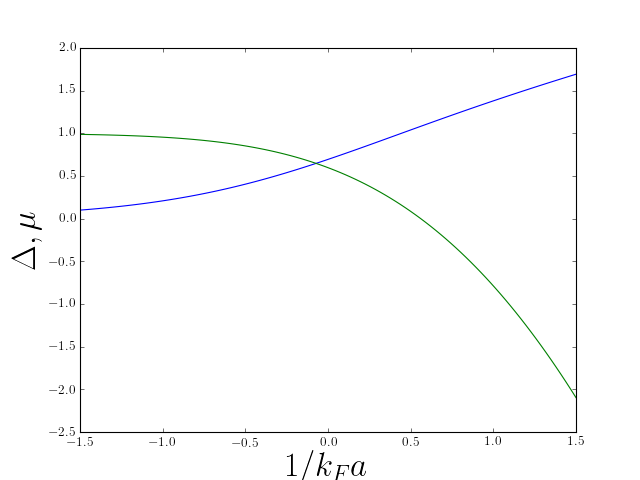

In [194]:
inverse_kFa = np.linspace(-1.5,1.5,100)
plt.plot(inverse_kFa, [Solutions(inverse_kFa_val).x[0] for inverse_kFa_val in inverse_kFa])
plt.plot(inverse_kFa, [Solutions(inverse_kFa_val).x[1] for inverse_kFa_val in inverse_kFa])
plt.ylabel(r'$\Delta, \mu$', fontsize = 30)
plt.xlabel(r'$1/k_\text{F}a$', fontsize = 30, rotation = 'horizontal')
plt.show()